# Step 3 - Further Data Processing and EDA

**This notebook is split up into 2 main parts: Further Data Processing and EDA.** The first part isn't that lengthy and involved tokenizing, lemmatizing, and stemming the reviews of each album. At the end of this section, I've saved 3 new dataframes to the `datasets` folder of this repository: one with tokenized reviews, one with lemmatized reviews, and one with stemmed reviews.

### Part I: Further Data Processing

In [1]:
# Make necessary imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Read in csv of reviews, check head of dataframer
df = pd.read_csv('../datasets/other-datasets/pitchfork_reviews.csv')
df.head()

,Unnamed: 0,album,artist,score,genre,date,label,author,review
0,0,Set My Heart on Fire Immediately,Perfume Genius,9.0,Pop/R&B,2020,Matador,Madison Bloom,Each Perfume Genius album is a metamorphosis. ...
1,1,WILL THIS MAKE ME GOOD,Nick Hakim,6.0,Rock,2020,ATO,Jonah Bromwich,Nick Hakim’s compulsively listenable debut alb...
2,2,"Every Sun, Every Moon",I'm Glad It's You,7.4,Rock,2020,6131,Arielle Gordon,Grief casts a shadow over the past. It lends n...
3,3,The Quickening,Jim WhiteMarisa Anderson,7.8,Rock,2020,Thrill Jockey,Jesse Jarnow,The Quickening opens with an ecstatic swirl of...
4,4,Dare,The Human League,9.1,Electronic,1981,Virgin,Brad Nelson,"In late 1980, the singer Philip Oakey was sche..."


**Check for nulls, drop any unecessary columns, check data types**

In [4]:
# Drop column called Unnamed:0
df.drop(columns='Unnamed: 0', inplace = True)

In [5]:
# Check for nulls
df.isnull().sum()

# Drop nulls
df.dropna(inplace = True)

In [6]:
# Check data types
df.dtypes

album      object
artist     object
score     float64
genre      object
date       object
label      object
author     object
review     object
dtype: object

#### Date

In exploring the rows of this dataset, it looks like the date column didn't scrape cleanly. For a majority of the entries, the value is exactly as it should be: 4 characters long, refelcting the year the album was released in. Below is a further exploration into some of the problematic values:

In [7]:
# A look at all the unique values in the date column
df['date'].unique()

array(['2020', '1981', '1972', '1994', '1986', '1979', '1977', '1978',
       '1983', '1985', '2000', '1973', '1995', '1975', '1997', '1993',
       '1990', '1969', '2001', '2002', '2009', '2019', '1999', '1971',
       '2004', '1980', '1976', '1992', '1962', '2012', '2010', '2008',
       '2014', '2006', '1974', '1998', '1996', '2013', '1987', '2011',
       '2003', '1991', '1982', '1989', '2018', '1988', '1970', '2016',
       '1968', '1967', '1957', '2017', '2007', '1984', '2015', '1966',
       '1967/2017', '1974/2017', '1997/2017', '1982/2017', '1985/2017',
       '1972/2017', '1996/2017', '1995/2017', '1988/2017', '2006/2017',
       '1971/2017', '2012/2017', '1970/2017', '1977/2017', '1989/2017',
       '1979/2017', '2002/2017', '1976/2017', '1987/2017', '2000/2017',
       '2001/2017', '1965', '2004/2017', '1999/2017', '1996/2016',
       '1966/2016', '1991/2016', '1968/2016', '1995/2016', '1962/2016',
       '2003/2016', '1994/2016', '1979/2016', '1971/2016', '1969/2016',
    

**In order to clean this up, we should first understand the variability of these values. Again, the ideal value in this column will have a length of 4. So let's find out the various lengths of values in this column.**

In [8]:
# Unique values in data column
date_lengths = []

for i in df['date'].unique():
    if len(i) not in date_lengths:
        date_lengths.append(len(i))

date_lengths
# These are the various lengths of entries in the date column

[4, 9, 6, 11, 2]

**Examples of date values with varying lengths**

|Length of Date Value|Example|Explanation|
|---|---|---|
|2|¢|The initial problem here is unclear, and these rows should be dropped from the dataframe|
|4|2019|The correct format in which the release date and review date are the same|
|6|¢ 2010|The correct format with an unwanted character preceding the correct value|
|9|1992/2008|The release/review date. We're interested in the release date, and will drop the review date|
|11|¢ 1971/2005|The release date/review date with an unwanted character. Again, we'll only keep the release date|

**Let's create a function that will clean each date:**

In [9]:
# Create function to clean the dates in the dataframe:

def clean_dates(dates):
    
    # Create empty list in which to store cleaned date values
    new_dates = []
    
    # Begin for loop that will check every date in the column
    for date in dates:
        
        # Append this value, although it's incorrect. We'll deal with it later
        if len(date) == 2:
            new_dates.append(date)
        
        # Append all correctly formated values
        elif len(date) == 4:
            new_dates.append(date)
        
        # Append only the release date (year)
        elif len(date) == 6:
            new_dates.append(date[2:])
        
        # Append only the release date (year)
        elif len(date) == 9:
            new_dates.append(date[:4])
        
        # Append only the release date (year)
        else:
            new_dates.append(date[2:6])
            
    return new_dates

# Call the function and set it equal to a variable
release_date = clean_dates(df['date'])

# Add new column to our dataframe called 'release_date' with our cleaned data
df['release_date'] = release_date

# Drop the date column from our dataframe
df.drop(columns='date', inplace = True)

In [10]:
# Check to see how to function worked: all data should be in the proper format, except for '¢ '
df['release_date'].unique()

array(['2020', '1981', '1972', '1994', '1986', '1979', '1977', '1978',
       '1983', '1985', '2000', '1973', '1995', '1975', '1997', '1993',
       '1990', '1969', '2001', '2002', '2009', '2019', '1999', '1971',
       '2004', '1980', '1976', '1992', '1962', '2012', '2010', '2008',
       '2014', '2006', '1974', '1998', '1996', '2013', '1987', '2011',
       '2003', '1991', '1982', '1989', '2018', '1988', '1970', '2016',
       '1968', '1967', '1957', '2017', '2007', '1984', '2015', '1966',
       '1965', '1964', '1960', '2005', '1963', '1959', '¢ '], dtype=object)

In [11]:
# Gather all rows with the '¢ ' date and store it in a unique dataframe
drop_rows = df[df['release_date'] == '¢ ']

# Drop these rows from the dataframe
[df.drop(i, inplace = True) for i in drop_rows.index]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
# Check our work: the command below should return nothing
df[df['release_date'] == '¢ ']

,album,artist,score,genre,label,author,review,release_date


In [13]:
# Save work back to the datasets folder
df.to_csv(r'../datasets/cleaned_reviews.csv')

### Functions

Create tokenized, stemmed, and lemmatized versions of the dataframes, then save a version of each to the `datasets` folder.

**Tokenizing Function**

In [ ]:
# The following function will tokenize each document (review) in the corpus
def tokenize(dataframe):
    
    # Instantiate Tokenizer
    token = RegexpTokenizer(r'\w+')
    
    # tokenize each review in the dataframe
    review_tokens = []
    for review in dataframe['review']:
        r = token.tokenize(review.lower())
        review_tokens.append(r)

    # tokenize each artist in the dataframe
    artist_tokens = []
    for artist in dataframe['artist']:
        a = token.tokenize(artist)
        artist_tokens.append(a)
    
    # tokenize each label in the dataframe
    label_tokens = []
    for label in dataframe['label']:
        l = token.tokenize(label)
        label_tokens.append(l)
    
    # tokenize each author in the dataframe
    author_tokens = []
    for author in dataframe['author']:
        au = token.tokenize(author)
        author_tokens.append(au)
    
    # Replace all columns with new lists
    dataframe['review'] = review_tokens
    dataframe['artist'] = artist_tokens
    dataframe['label'] = label_tokens
    dataframe['author'] = author_tokens
        
    return dataframe

# Call the function and assign it to a new variable, check head of new tokenized dataframe
tokenized_reviews = tokenize(df)

# Save file as csv back to jupyter notebook
tokenized_reviews.to_csv(r'../datasets/other-datasets/cleaned_reviews_tokenized.csv')

**Lemmatizing Function**

In [ ]:
def lemmatize_df(dataframe):
    
    # Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Start with an empty list
    lemms = []
    
    # Create a nested for loop
    for review in dataframe['review']:
        
        new_review = []
        
        for token in review:
            
            lemma = lemmatizer.lemmatize(token)
            new_review.append(lemma)
            
        lemms.append(new_review)
            
    
    # Replace original columns with lemmatized tokens
    dataframe['review'] = lemms
    
    return dataframe

# Call function and assign it to a new variable
lemmatized_reviews = lemmatize_df(tokenized_reviews)

# Save file as csv back to jupyter notebook
lemmatized_reviews.to_csv(r'../datasets/other-datasets/cleaned_reviews_lemmatized.csv')

**Stemming Function**

In [ ]:
def stem_df(dataframe):
    
    # Instantiate stemmer
    stemmer = PorterStemmer()
    
    # Start with an empty list
    stems = []
    
    # Create a nested for loop
    for review in dataframe['review']:
        
        new_review = []
        
        for token in review:
            
            stem = stemmer.stem(token)
            new_review.append(stem)
            
        stems.append(new_review)
            
    
    # Replace original columns with lemmatized tokens
    dataframe['review'] = stems
    
    return dataframe

# Call function and assign it to a variable
stemmed_reviews = stem_df(tokenized_reviews)

# Save file as csv back to jupyter notebook
stemmed_reviews.to_csv(r'../datasets/other-datasets/cleaned_reviews_stemmed.csv')

### Part II: EDA

### Score

In [14]:
# Load in csv so as not to run the above cells
df = pd.read_csv('../datasets/other-datasets/cleaned_reviews.csv')

# 
df.drop(columns='Unnamed: 0', inplace = True)
df.head()

,album,artist,score,genre,label,author,review,release_date
0,Set My Heart on Fire Immediately,Perfume Genius,9.0,Pop/R&B,Matador,Madison Bloom,Each Perfume Genius album is a metamorphosis. ...,2020
1,WILL THIS MAKE ME GOOD,Nick Hakim,6.0,Rock,ATO,Jonah Bromwich,Nick Hakim’s compulsively listenable debut alb...,2020
2,"Every Sun, Every Moon",I'm Glad It's You,7.4,Rock,6131,Arielle Gordon,Grief casts a shadow over the past. It lends n...,2020
3,The Quickening,Jim WhiteMarisa Anderson,7.8,Rock,Thrill Jockey,Jesse Jarnow,The Quickening opens with an ecstatic swirl of...,2020
4,Dare,The Human League,9.1,Electronic,Virgin,Brad Nelson,"In late 1980, the singer Philip Oakey was sche...",1981


In [15]:
# Check datatypes
df.dtypes

album            object
artist           object
score           float64
genre            object
label            object
author           object
review           object
release_date      int64
dtype: object

In [16]:
# Take a look at mean, standard deviation, 25th and 75th percentile of pitchfork scores
df['score'].describe()

count    19165.000000
mean         7.065583
std          1.225540
min          0.000000
25%          6.500000
50%          7.300000
75%          7.800000
max         10.000000
Name: score, dtype: float64

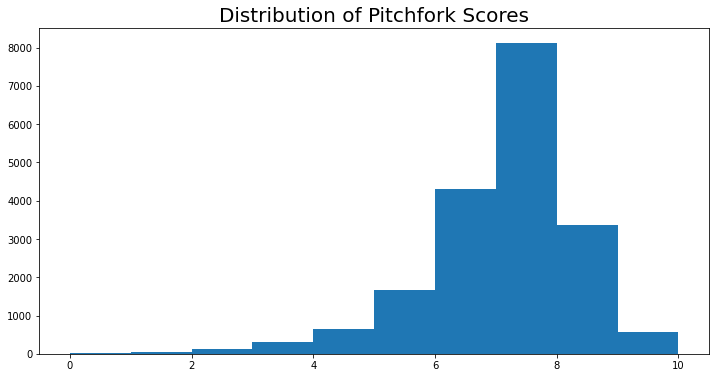

In [17]:
# Plot a histogram of all scores

plt.figure(figsize = (12, 6))
plt.hist(df['score']);
plt.title('Distribution of Pitchfork Scores', size = 20);

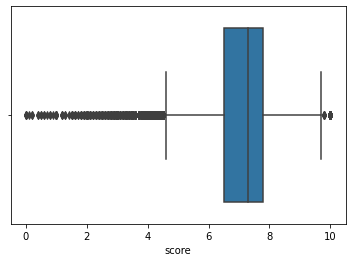

In [18]:
# Generate a box plot of all scores

sns.boxplot(df['score']);

**Ouliers**

There are 110 "positive" outliers (scores greater than 9.75) and 818 "negative" outliers (less than 4.55).

In [43]:
# Positive outliers
len(df[df['score'] > 9.75])

110

In [44]:
# Negative outliers
len(df[df['score'] < 4.55])

818

In [45]:
# Total outliers
len(df[df['score'] > 9.75]) + len(df[df['score'] < 4.55])

928

### Genre

In [19]:
# Check the list of unique genres in our dataframe
df['genre'].unique()

array(['Pop/R&B', 'Rock', 'Electronic', 'Rap', 'Folk/Country',
       'Experimental', 'Jazz', 'Global', 'Metal'], dtype=object)

In [20]:
# Check average pitchfork score by genre

print(f"Average pitchfork score for Pop/R&B albums is {round(df[df['genre'] == 'Pop/R&B']['score'].mean(), 1)}")
print(f"Average pitchfork score for Rock albums is {round(df[df['genre'] == 'Rock']['score'].mean(), 1)}")
print(f"Average pitchfork score for Electronic albums is {round(df[df['genre'] == 'Electronic']['score'].mean(), 1)}")
print(f"Average pitchfork score for Rap albums is {round(df[df['genre'] == 'Rap']['score'].mean(), 1)}")
print(f"Average pitchfork score for Folk/Country albums is {round(df[df['genre'] == 'Folk/Country']['score'].mean(), 1)}")
print(f"Average pitchfork score for Experimental albums is {round(df[df['genre'] == 'Experimental']['score'].mean(), 1)}")
print(f"Average pitchfork score for Jazz albums is {round(df[df['genre'] == 'Jazz']['score'].mean(), 1)}")
print(f"Average pitchfork score for Global albums is {round(df[df['genre'] == 'Global']['score'].mean(), 1)}")
print(f"Average pitchfork score for Metal albums is {round(df[df['genre'] == 'Metal']['score'].mean(), 1)}")

Average pitchfork score for Pop/R&B albums is 7.0
Average pitchfork score for Rock albums is 7.0
Average pitchfork score for Electronic albums is 7.0
Average pitchfork score for Rap albums is 7.0
Average pitchfork score for Folk/Country albums is 7.2
Average pitchfork score for Experimental albums is 7.4
Average pitchfork score for Jazz albums is 7.6
Average pitchfork score for Global albums is 7.4
Average pitchfork score for Metal albums is 7.1


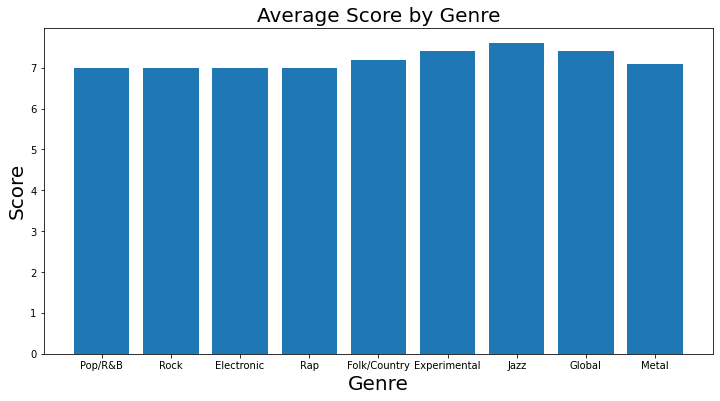

In [21]:
# Make a bar chart of average scores by genre

avg_score_by_genre = [round(df[df['genre'] == 'Pop/R&B']['score'].mean(), 1),
                      round(df[df['genre'] == 'Rock']['score'].mean(), 1), 
                      round(df[df['genre'] == 'Electronic']['score'].mean(), 1),
                      round(df[df['genre'] == 'Rap']['score'].mean(), 1),
                      round(df[df['genre'] == 'Folk/Country']['score'].mean(), 1),
                      round(df[df['genre'] == 'Experimental']['score'].mean(), 1),
                      round(df[df['genre'] == 'Jazz']['score'].mean(), 1),
                      round(df[df['genre'] == 'Global']['score'].mean(), 1),
                      round(df[df['genre'] == 'Metal']['score'].mean(), 1)]

plt.figure(figsize = (12, 6))
plt.bar(df['genre'].unique(), avg_score_by_genre)
plt.title('Average Score by Genre', size = 20)
plt.xlabel('Genre', size = 20)
plt.ylabel('Score', size = 20);

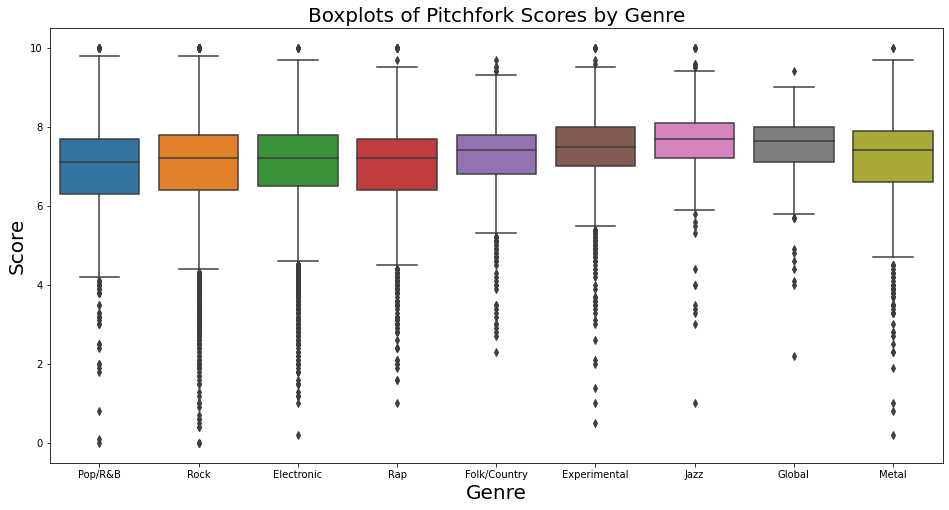

In [22]:
# Generate one graph of box plots of scores by genre

scores_by_genre = [df[df['genre'] == 'Pop/R&B']['score'],
                   df[df['genre'] == 'Rock']['score'], 
                   df[df['genre'] == 'Electronic']['score'],
                   df[df['genre'] == 'Rap']['score'],
                   df[df['genre'] == 'Folk/Country']['score'],
                   df[df['genre'] == 'Experimental']['score'],
                   df[df['genre'] == 'Jazz']['score'],
                   df[df['genre'] == 'Global']['score'],
                   df[df['genre'] == 'Metal']['score']]

plt.figure(figsize = (16, 8))
sns.boxplot(x = 'genre', y = 'score', data = df)
plt.xlabel('Genre', size = 20)
plt.ylabel('Score', size = 20)
plt.title('Boxplots of Pitchfork Scores by Genre', size = 20);

In [23]:
# Check to see how many reviews there are by genre
df['genre'].value_counts()

Rock            7477
Electronic      4146
Rap             1969
Experimental    1945
Pop/R&B         1483
Folk/Country     812
Metal            802
Jazz             341
Global           190
Name: genre, dtype: int64

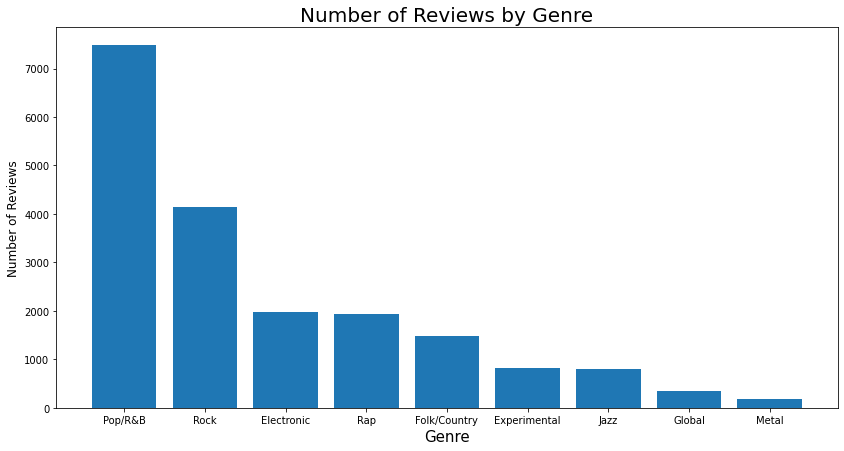

In [24]:
# Make a bar graph of the number of reviews by genre

plt.figure(figsize = (14, 7))
plt.bar(df['genre'].unique(), df['genre'].value_counts())
plt.title('Number of Reviews by Genre', size = 20)
plt.xlabel('Genre', size = 15)
plt.ylabel('Number of Reviews', size = 12);

### Year

In [25]:
df.head()

,album,artist,score,genre,label,author,review,release_date
0,Set My Heart on Fire Immediately,Perfume Genius,9.0,Pop/R&B,Matador,Madison Bloom,Each Perfume Genius album is a metamorphosis. ...,2020
1,WILL THIS MAKE ME GOOD,Nick Hakim,6.0,Rock,ATO,Jonah Bromwich,Nick Hakim’s compulsively listenable debut alb...,2020
2,"Every Sun, Every Moon",I'm Glad It's You,7.4,Rock,6131,Arielle Gordon,Grief casts a shadow over the past. It lends n...,2020
3,The Quickening,Jim WhiteMarisa Anderson,7.8,Rock,Thrill Jockey,Jesse Jarnow,The Quickening opens with an ecstatic swirl of...,2020
4,Dare,The Human League,9.1,Electronic,Virgin,Brad Nelson,"In late 1980, the singer Philip Oakey was sche...",1981


In [26]:
df_by_date = df.set_index('release_date')
df_by_date.sort_index(inplace = True)
df_by_date.head()

,album,artist,score,genre,label,author,review
release_date,,,,,,,
1957,Way Out West,Sonny Rollins,8.8,Jazz,Craft,Natalie Weiner,Sonny Rollins doesn’t fear the familiar. He’s ...
1957,Monk’s Music,Thelonious Monk,9.1,Jazz,Riverside,Ben Ratliff,The summer of 1957 would seem to mark the rede...
1959,Drums of Passion,Babatunde Olatunji,8.2,Global,Sony,Mia Clarke,Nigerian drummer Babatunde Olatunji enjoyed a ...
1960,This Is Our Music,Ornette Coleman,9.4,Jazz,Atlantic,Mark Richardson,Ornette Coleman has followed a strange path. M...
1960,At Last!,Etta James,9.0,Jazz,Jackpot Records,Amanda Petrusich,Anyone trying to reverse-engineer the particul...


In [27]:
df['release_date'].value_counts().head(50)

2018    1099
2016    1073
2017    1069
2015    1066
2019    1061
2007    1049
2011    1042
2010    1032
2005    1024
2008    1016
2009    1005
2006     987
2012     932
2003     888
2013     877
2004     874
2002     793
2014     773
2020     380
2001     254
1997      42
1996      41
1994      39
1998      35
1999      34
2000      33
1971      32
1995      31
1992      31
1981      30
1979      30
1993      28
1980      28
1977      27
1982      26
1970      25
1988      25
1990      24
1991      23
1972      22
1987      21
1985      21
1975      20
1989      20
1974      19
1973      18
1968      17
1978      16
1969      16
1986      14
Name: release_date, dtype: int64

In [28]:
df_by_date.groupby('release_date')['score'].mean()

release_date
1957    8.950000
1959    8.200000
1960    9.200000
1962    8.525000
1963    9.433333
          ...   
2016    7.124231
2017    7.179233
2018    7.137853
2019    7.204901
2020    7.182632
Name: score, Length: 62, dtype: float64

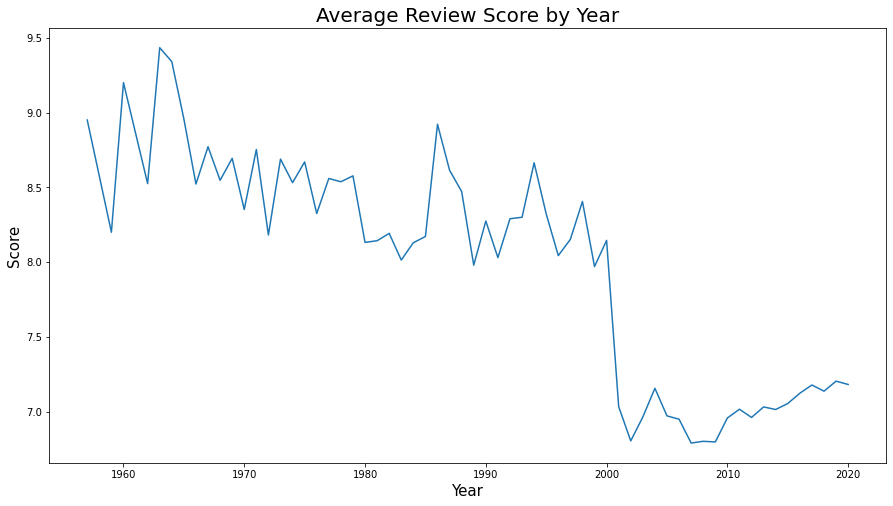

In [29]:
plt.figure(figsize = (15, 8))
plt.plot(df_by_date.index.unique(), df_by_date.groupby('release_date')['score'].mean())
plt.title('Average Review Score by Year', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Score', size = 15);

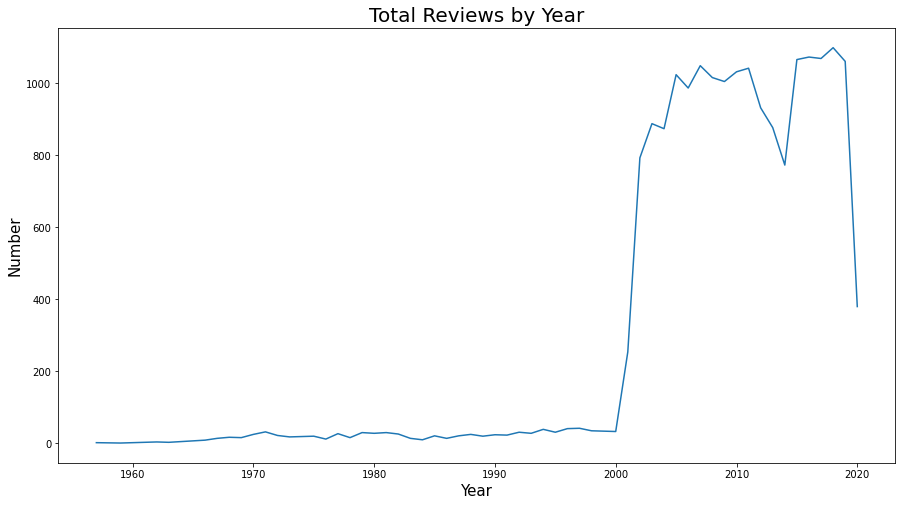

In [30]:
plt.figure(figsize = (15, 8))
plt.plot(df_by_date.index.unique(), df.groupby('release_date')['release_date'].value_counts())
plt.title('Total Reviews by Year', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Number', size = 15);

### Artist

In [31]:
df['artist'].describe()

count           19165
unique           9025
top       David Bowie
freq               26
Name: artist, dtype: object

In [32]:
df['artist'].value_counts().head(20)

David Bowie            26
Neil Young             24
Guided by Voices       22
Bob Dylan              22
The Beatles            21
Of Montreal            20
The Fall               20
Sonic Youth            20
Xiu Xiu                19
Four Tet               19
Animal Collective      19
Gucci Mane             19
The Mountain Goats     18
Robert Pollard         18
R.E.M.                 18
Mogwai                 18
Belle and Sebastian    17
Bruce Springsteen      16
The Flaming Lips       16
Prince                 16
Name: artist, dtype: int64

In [34]:
round(df.groupby('artist')['score'].mean().sort_values(ascending = False).head(40), 2)

artist
Slint                                       10.00
Carole King                                 10.00
Television                                  10.00
Talk Talk                                   10.00
Herbie Hancock                              10.00
The Stone Roses                             10.00
Glenn Gould                                 10.00
Captain Beefheart and His Magic Band        10.00
X-Ray Spex                                  10.00
N.W.A.                                       9.70
Ultramagnetic MC's                           9.70
D’Angelo                                     9.60
My Bloody Valentine                          9.55
Farben                                       9.50
Roxy Music                                   9.50
La Monte Young                               9.50
A Tribe Called Quest                         9.50
Milton NascimentoLô Borges                   9.50
Minutemen                                    9.50
Morton FeldmanIves Ensemble                

In [23]:
df.groupby('artist')['score'].mean().sort_values().head(40)

artist
Travis Morrison                 0.00
Push Kings                      0.10
Shat                            0.20
Dan Le Sac vs. Scroobius Pip    0.20
Non                             0.50
Liars Academy                   0.60
Avey TareKría Brekkan           1.00
MetallicaLou Reed               1.00
Geoff Farina                    1.00
Ghostland Observatory           1.50
Mika                            1.50
Panic! At The Disco             1.50
Towers of London                1.50
The Airborne Toxic Event        1.60
N.A.S.A.                        1.60
Greta Van Fleet                 1.60
Jet                             1.85
Ninjasonik                      1.90
Nate Denver's Neck              1.90
Har Mar Superstar               1.95
Jessie J                        2.00
Amanda Blank                    2.00
Guther                          2.00
The Anniversary                 2.00
Alexander Tucker                2.00
Goldie Lookin' Chain            2.00
Brassy                         

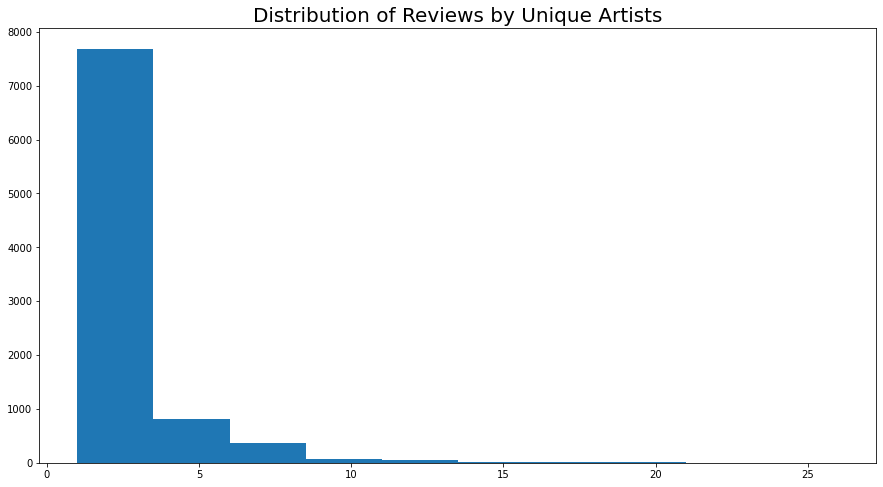

In [38]:
plt.figure(figsize = (15, 8))
plt.hist(df['artist'].value_counts())
plt.title('Distribution of Reviews by Unique Artists', size = 20);

In [24]:
df[df['score'] == 0]

,album,artist,score,genre,label,author,review,release_date
14525,Shine On,Jet,0.0,Rock,Elektra,Ray Suzuki,,2006
16040,Relaxation of the Asshole,Robert Pollard,0.0,Rock,Rockathon,Eric Carr,If more drunks would learn from Robert Pollard...,2005
16625,Travistan,Travis Morrison,0.0,Pop/R&B,Barsuk,Chris Dahlen,Travis Morrison got his ass kicked. He tells t...,2004
17818,Liz Phair,Liz Phair,0.0,Rock,Capitol,Matt LeMay,It could be said that Liz Phair's greatest ass...,2003


### Author

In [25]:
# How maany authors have awarded a 10/10?
df[df['score'] == 10]['author'].value_counts()

Mark Richardson            14
Jenn Pelly                  5
Scott Plagenhoef            4
Stuart Berman               4
Ryan Dombal                 4
Jayson Greene               3
Matt LeMay                  3
Nate Patrin                 3
Amanda Petrusich            3
Jeff Weiss                  2
Barry Walters               2
Maura Johnston              2
Chris Dahlen                2
Rob Mitchum                 2
Jess Harvell                2
Philip Sherburne            2
Ian Cohen                   2
Jeremy D. Larson            2
Nitsuh Abebe                2
Douglas Wolk                2
Simon Reynolds              2
Carvell Wallace             2
Amy Granzin                 1
Stephen Thomas Erlewine     1
Stephen M. Deusner          1
Paul A. Thompson            1
Laura Snapes                1
Andy Beta                   1
Jillian Mapes               1
Jessica Hopper              1
kris ex                     1
Tom Ewing                   1
Nelson George               1
Joe Tangar

In [26]:
# Check to see how many unique authors there are
df['author'].describe()

count         19165
unique          557
top       Ian Cohen
freq            760
Name: author, dtype: object

In [71]:
# Find the "favorite authors"
df.groupby('author')['score'].mean().sort_values(ascending = False).head(20)

author
Nelson George                        10.000000
Dan Brooks                           10.000000
Jeff Chang                           10.000000
Ryan Reed                            10.000000
Carvell Wallace                       9.833333
Simon Reynolds                        9.766667
Matthew Trammell                      9.600000
Dorian Lynskey                        9.500000
Rob Tannenbaum                        9.500000
Alex Pappademas                       9.400000
Alan Light                            9.400000
Rollie Pemberton & Nick Sylvester     9.400000
Michael A.  Gonzales                  9.300000
Danielle Jackson                      9.300000
Luc Sante                             9.300000
Vivien Goldman                        9.300000
Daphne A. Brooks                      9.200000
Sasha Frere-Jones                     9.200000
Josephine Livingstone                 9.150000
Shuja Haider                          9.100000
Name: score, dtype: float64

In [33]:
# Which authors wrote the most reviews?
df['author'].value_counts().head(20)

Ian Cohen             760
Stephen M. Deusner    685
Joe Tangari           635
Stuart Berman         536
Mark Richardson       509
Brian Howe            481
Marc Hogan            426
Philip Sherburne      408
Andy Beta             350
Jayson Greene         316
Nate Patrin           304
Marc Masters          289
Brandon Stosuy        259
Jason Crock           244
Larry Fitzmaurice     240
Rob Mitchum           234
Jess Harvell          231
Matthew Murphy        226
Grayson Currin        226
Andrew Gaerig         219
Name: author, dtype: int64

In [34]:
# Which authors wrote the least reviews?
df['author'].value_counts().tail(20)

Chip Chanko                                                    1
Seth Colter-Walls                                              1
Bhanuj Kappal                                                  1
Oliver Wang                                                    1
Amy Schroeder                                                  1
Nazuk Kochhar                                                  1
Maggie Serota                                                  1
Casey Rea                                                      1
Choppa Moussaoui, with help from Mullah Omar, Ethan P, and     1
Rahawa Haile                                                   1
Frankie Caracciolo                                             1
Zach Hooker                                                    1
Brian Howe & Brandon Stosuy                                    1
JT Ramsay                                                      1
Marty Sartini Garner                                           1
Mark Richard-San & Ryan S

In [36]:
# There are 557 unique reviewers for Pitchfork
df['author'].value_counts().describe()

count    557.000000
mean      34.407540
std       81.950881
min        1.000000
25%        2.000000
50%        7.000000
75%       27.000000
max      760.000000
Name: author, dtype: float64

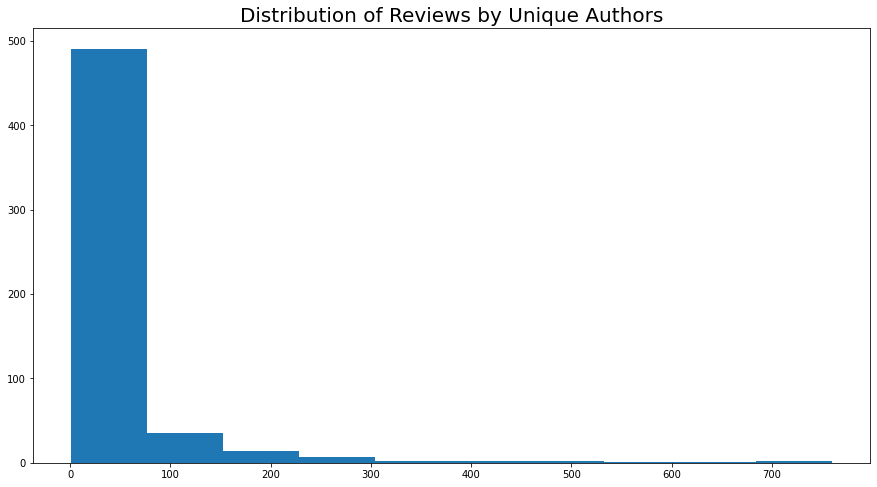

In [43]:
# Distribution of reviews by author
plt.figure(figsize = (15, 8))
plt.hist(df['author'].value_counts())
plt.title('Distribution of Reviews by Unique Authors', size = 20);

### Feature Engineering

There's one piece of feature engineering we're going to start with, and that's the length of the review itself. The idea is this: if an album is rated more favorably, perhaps the author had more to say about it, whereas if the album is rated less favorably, perhaps the author had less to say about it before moving on to the next review.

This is a feature that's to be included on all the files that have been created so far (a base file, a tokenized file, a lemmatized file, and a stemmed file). Read in all files, create length of review column, and save files back to `datasets` folder

In [119]:
# Read in the 3 datasets

df_token = pd.read_csv('../datasets/other-datasets/cleaned_reviews_tokenized.csv')
df_lemm = pd.read_csv('../datasets/other-datasets/cleaned_reviews_lemmatized.csv')
df_stem = pd.read_csv('../datasets/other-datasets/cleaned_reviews_stemmed.csv')

# Set index to be the album
df_token.set_index('album', inplace = True)
df_lemm.set_index('album', inplace = True)
df_stem.set_index('album', inplace = True)

# Drop column 'Unnamed: 0'

df_token.drop(columns = ['Unnamed: 0'], inplace = True)
df_lemm.drop(columns = ['Unnamed: 0'], inplace = True)
df_stem.drop(columns = ['Unnamed: 0'], inplace = True)

In [120]:
# Create the review length column in each of the 3 datasets

df_token['review_length'] = [len(review) for review in df_token['review']]
df_lemm['review_length'] = [len(review) for review in df_lemm['review']]
df_stem['review_length'] = [len(review) for review in df_stem['review']]

In [112]:
df_token.head()

,artist,score,genre,label,author,review,release_date
album,,,,,,,
Set My Heart on Fire Immediately,Perfume Genius,9.0,Pop/R&B,Matador,Madison Bloom,"['each', 'perfume', 'genius', 'album', 'is', '...",2020
WILL THIS MAKE ME GOOD,Nick Hakim,6.0,Rock,ATO,Jonah Bromwich,"['nick', 'hakim', 's', 'compulsively', 'listen...",2020
"Every Sun, Every Moon",I'm Glad It's You,7.4,Rock,6131,Arielle Gordon,"['grief', 'casts', 'a', 'shadow', 'over', 'the...",2020
The Quickening,Jim WhiteMarisa Anderson,7.8,Rock,Thrill Jockey,Jesse Jarnow,"['the', 'quickening', 'opens', 'with', 'an', '...",2020
Dare,The Human League,9.1,Electronic,Virgin,Brad Nelson,"['in', 'late', '1980', 'the', 'singer', 'phili...",1981


#### Dummy variables: Genre

The next piece of feature engineering we're going to do is to dummify the `genre` column. This approach makes the most sense: the columns `artist`, `author`, and `label` were tokenized because there were hundreds (if not thousands) of unique values for each. However, there are only 9 unique values for the `genre` column, which makes it an excellent option for creating dummy variables. 

As a reminder, the unique genres in the `genre` column are:

    - Pop/R&B
    - Rock
    - Electronic
    - Rap
    - Folk/Country
    - Experimental
    - Jazz
    - Global
    - Metal

### New approach -- only use NLP on the `review`, not on `author`, `artist` or `label`

Initially, I had hoped to use NLP Vectorization for each album's `review`, `label`, and `artist`. Dummying the `artist` and `label` would be prefereable, but there are thousands of unique values for each. 

One of the biggest issues I've run into so far is having a dataframe with too many columns. A way to reduce the number of columns in the dataframe is to simply count the number of `artists` and `labels` for each album, which can use the frequency of these two variables in the model without creating thousands of new columns.

**Frequency variables for `df_token`**

In [121]:
# Artist Frequency
artist_freq = df_token['artist'].value_counts()
df_token['artist_freq'] = df_token['artist'].map(artist_freq)

# Label Frequency
label_freq = df_token['label'].value_counts()
df_token['label_freq'] = df_token['label'].map(label_freq)

# Author Frequency
author_freq = df_token['author'].value_counts()
df_token['author_freq'] = df_token['author'].map(author_freq)

**Frequency variables for `df_lemm`**

In [122]:
# Artist Frequency
artist_freq = df_lemm['artist'].value_counts()
df_lemm['artist_freq'] = df_lemm['artist'].map(artist_freq)

# Label Frequency
label_freq = df_lemm['label'].value_counts()
df_lemm['label_freq'] = df_lemm['label'].map(label_freq)

# Author Frequency
author_freq = df_lemm['author'].value_counts()
df_lemm['author_freq'] = df_lemm['author'].map(author_freq)

**Frequency variables for `df_lemm`**

In [123]:
# Artist Frequency
artist_freq = df_stem['artist'].value_counts()
df_stem['artist_freq'] = df_stem['artist'].map(artist_freq)

# Label Frequency
label_freq = df_stem['label'].value_counts()
df_stem['label_freq'] = df_stem['label'].map(label_freq)

# Author Frequency
author_freq = df_stem['author'].value_counts()
df_stem['author_freq'] = df_stem['author'].map(author_freq)

### **Dummy Variables**

In [124]:
# Create dummy variables
token_dummies = pd.get_dummies(df_token['genre'])
lemm_dummies = pd.get_dummies(df_lemm['genre'])
stem_dummies = pd.get_dummies(df_stem['genre'])

# Add dummy variables to each dataframe
df_token = pd.concat([df_token, token_dummies], axis = 1, join = 'outer')
df_lemm = pd.concat([df_lemm, lemm_dummies], axis = 1, join = 'outer')
df_stem = pd.concat([df_stem, stem_dummies], axis = 1, join = 'outer')

# Save datasets back to notebook
df_token.to_csv(r'../datasets/final-datasets/cleaned_dummied_tokenized_reviews.csv')
df_lemm.to_csv(r'../datasets/final-datasets/cleaned_dummied_lemmatized_reviews.csv')
df_stem.to_csv(r'../datasets/final-datasets/cleaned_dummied_stemmed_reviews.csv')

**Create a heatmap to see correlation coefficients of each quantitative variable to the `score` of the album.**

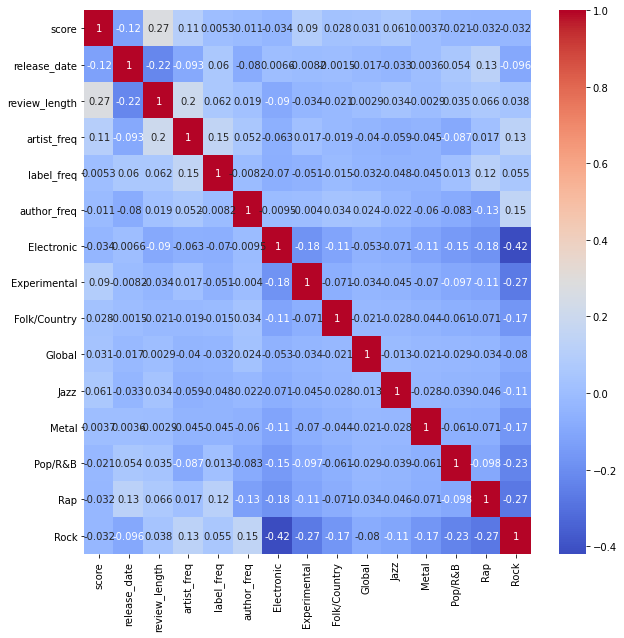

In [125]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_token.corr(), annot = True, cmap = 'coolwarm');

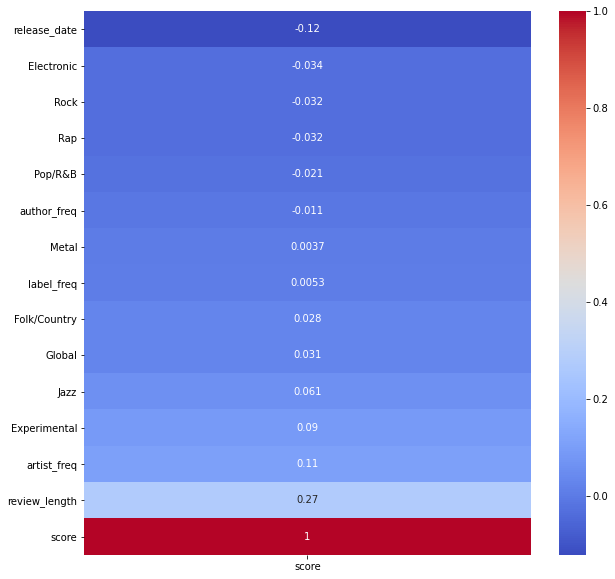

In [126]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_token.corr()[['score']].sort_values('score'), annot = True, cmap = 'coolwarm');

## MODEL EXPERIMENTATION

Everything you see below are experiments in determining what model might ultimately be the best fit, and include GridSearch experiments to see if CountVectorizer hyperparameters change with different regressors.

### Natural Language Processing

**Make Necessary Imports and Read in CSVs**

In [71]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

df_token = pd.read_csv('../datasets/final-datasets/tokenized/cleaned_dummied_tokenized_reviews.csv')
df_lemm = pd.read_csv('../datasets/final-datasets/lemmatized/cleaned_dummied_lemmatized_reviews.csv')
df_stem = pd.read_csv('../datasets/final-datasets/stemmed/cleaned_dummied_stemmed_reviews.csv')

df_token.set_index('album', inplace = True)
df_lemm.set_index('album', inplace = True)
df_stem.set_index('album', inplace = True)

# Define function to remove come of the columns from the dataframe after it's been CountVectorized
# This is necessary because this dataset produces over 113,000 columns when CountVectorized, which is
#\n too many to be modeled with the RAM space on my local machine

def stop_word_list(table, upper_limit):
    remove_list = []
    for column in table.columns:
        if sum(table[column]) >= upper_limit:
            remove_list.append(column)

    return remove_list

# Define a function to remove words 

def drop_columns(table, lower_limit):
    remove_list = []
    for column in table.columns:
        if sum(table[column]) <= lower_limit:
            remove_list.append(column)
    table.drop(columns = remove_list, inplace = True)    
    return table


**Create custom stop words**

Through guess and check, I've determined that words that appear more than 500 times in the corpus account for about 3% of words in all documents. I've created a unique list for the `tokenized`, `lemmatized`, and `stemmed` datasets for the purpose of being used as `stop words` when building future models.

In [65]:
# Tokenized stopwords
cvec = CountVectorizer()
X_tok = df_token['review']
X_tok = cvec.fit_transform(X_tok).astype('int8')
X_tok_new = pd.DataFrame(X_tok.toarray(),
                         columns = cvec.get_feature_names())

stop_words_token = stop_word_list(X_tok_new, 500)
[stop_words_token.append(word) for word in CountVectorizer(stop_words = 'english').get_stop_words()]
stop_words_token = list(dict.fromkeys(stop_words_token))
sw_token = pd.DataFrame(columns = ['stop_words_token'])
sw_token['stop_words'] = stop_words_token
sw_token.to_csv('../datasets/final-datasets/tokenized/stop_words_tokenized.csv')

# Lemmatized stopwords
cvec = CountVectorizer()
X_lemm = df_lemm['review']
X_lemm = cvec.fit_transform(X_lemm).astype('int8')
X_lemm_new = pd.DataFrame(X_lemm.toarray(),
                          columns = cvec.get_feature_names())

stop_words_lemm = stop_word_list(X_lemm_new, 500)
[stop_words_lemm.append(word) for word in CountVectorizer(stop_words = 'english').get_stop_words()]
stop_words_lemm = list(dict.fromkeys(stop_words_lemm))
sw_lemm = pd.DataFrame(columns = ['stop_words'])
sw_lemm['stop_words'] = stop_words_lemm
sw_lemm.to_csv('../datasets/final-datasets/lemmatized/stop_words_lemmatized.csv')

# Stemmed stopwords
cvec = CountVectorizer()
X_stem = df_stem['review']
X_stem = cvec.fit_transform(X_stem).astype('int8')
X_stem_new = pd.DataFrame(X_stem.toarray(),
                     columns = cvec.get_feature_names())

stop_words_stem = stop_word_list(X_stem_new, 500)
[stop_words_stem.append(word) for word in CountVectorizer(stop_words = 'english').get_stop_words()]
stop_words_stem = list(dict.fromkeys(stop_words_stem))
sw_stem = pd.DataFrame(columns = ['stop_words'])
sw_stem['stop_words'] = stop_words_stem
sw_stem.to_csv('../datasets/final-datasets/stemmed/stop_words_stemmed.csv')

**Grid Search to find best `CountVectorizer` parameters**

We can't use `GridSearch` over the variables that are not language components from the `CountVectorizer`. So in the below cell, the `train_test_split` is used to create a model with **only** the `review` variable included in the model. We can then used `GridSearch` to determine the best parameters to use in the ultimate model.

In [80]:
y_train.shape

(14373,)

In [82]:
len(stop_words_token)

2794

In [79]:
X_train_df.shape

(14373, 59865)

**Model pre-processing**

In [83]:
# Define X and y
X = df_token['review']
y = df_token['score']

# Do a train_test_split of X and y
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 1957)

#  Create a pipeline with CountVectorizer and Linear Regression
pipe = Pipeline([
   ('cvec', CountVectorizer()),
   ('lr', LinearRegression())
])

# Create pipeline parameters
pipe_params = {
    'cvec__max_features' : [2000, 3000, 4000, 5000],
    'cvec__stop_words' : [stop_words_token],
    'cvec__ngram_range' : [(1, 4), (1, 5), (1, 6)]
}

# Gridsearch over Pipeline and Pipeline parameters
gs = GridSearchCV(pipe,
                  pipe_params, 
                  cv = 5) 

gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'cvec__max_features': 2000, 'cvec__ngram_range': (1, 4), 'cvec__stop_words': ['000', '10', '100', '11', '12', '13', '14', '15', '16', '18', '1960s', '1970s', '1980s', '1990s', '1994', '1995', '1996', '1997', '1998', '1999', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '21st', '25', '30', '40', '50', '60s', '70s', '80s', '90s', 'ability', 'able', 'about', 'above', 'absence', 'absolutely', 'abstract', 'accessible', 'accomplished', 'according', 'acid', 'acoustic', 'across', 'act', 'action', 'acts', 'actual', 'actually', 'ad', 'adams', 'add', 'added', 'adding', 'addition', 'adds', 'adult', 'adventurous', 'aesthetic', 'affair', 'affecting', 'affiliate', 'aforementioned', 'afraid', 'african', 'after', 'again', 'against', 'age', 'aggressive', 'ago', 'ahead', 'ain', 'air', 'airy', 'aka', 'albeit', 'album', 'albums', 'alien', 'alive', 'all', 'allow', 'allowed', 'allowing', 'allows', 'almost

**Decision Tree Regressor**

In [84]:
# Define X and y
X = df_token['review']
y = df_token['score']

# Do a train_test_split of X and y
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 1957)


#Instantiate an instance of CountVectorizer
cvec = CountVectorizer()

# Fit and transform X_train with the CountVectorizer
X_train_df = cvec.fit_transform(X_train).astype('int8')
X_train_df = pd.DataFrame(X_train_df.toarray(),
                          columns = cvec.get_feature_names(),
                          index = X_train.index)

# Call the funciton defined above to remove inconsequential columns
X_train_df = drop_columns(X_train_df, 2)

print('X_train finished processing')

# Do the same thing for X_test
X_test_df = cvec.transform(X_test).astype('int8')
X_test_df = pd.DataFrame(X_test_df.toarray(),
                         columns = cvec.get_feature_names(),
                         index = X_test.index)

# Call the funciton defined above to remove inconsequential columns
X_test_df = drop_columns(X_test_df, 2)

print('X_test finished processing')

#  Create a pipeline with CountVectorizer and Linear Regression
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words = stop_words_token)),
    ('dr', DecisionTreeRegressor())
])

# Create pipeline parameters
pipe_params = {
    'cvec__max_features' : [2000, 3000, 4000, 5000],
    'cvec__ngram_range' : [(1, 4), (1, 5), (1, 6)]
}

# Gridsearch over Pipeline and Pipeline parameters
gs = GridSearchCV(pipe,
                  pipe_params, 
                  cv = 5) 

gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'cvec__max_features': 4000, 'cvec__ngram_range': (1, 5)}
-0.6938216979596689


**Linear Regression**

In [67]:
# Create X and y variables

features = ['review', 'release_date', 'review_length', 'artist_freq', 'label_freq', 
            'Electronic', 'Experimental', 'Folk/Country', 'Global', 'Jazz', 'Metal', 
            'Pop/R&B', 'Rap', 'Rock']

# Define X and y
X = df[features]
y = df['score']

# Do a train_test_split of X and y
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 1957)


cvec = CountVectorizer(max_features = 2000,
                       ngram_range = (1, 4),
                       stop_words = 'english')

review_train = cvec.fit_transform(X_train['review']).astype('int8')
review_train = pd.DataFrame(review_train.toarray(),
                            columns = cvec.get_feature_names(), 
                            index = X_train.index)
review_train = drop_columns(review_train, 2)
X_train = pd.concat([X_train, review_train], ignore_index = False, axis = 1)


review_test = cvec.transform(X_test['review']).astype('int8')
review_test = pd.DataFrame(review_test.toarray(),
                           columns = cvec.get_feature_names(),
                           index = X_test.index)
review_test = drop_columns(review_test, 2)
X_test = pd.concat([X_test, review_test], ignore_index = False, axis = 1)

X_train.drop(columns = ['review'], inplace = True)
X_test.drop(columns = ['review'], inplace = True)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(f'Train score of this model is {lr.score(X_train, y_train)}')
print(f'Test score of this model is {lr.score(X_test, y_test)}')
print(f'Cross val score is {cross_val_score(lr, X_train, y_train, cv = 5).mean()}') 

Train score of this model is 0.49327878528017943
Test score of this model is 0.31220137112574664
Cross val score is 0.26781635911916585


**Linear Regression**

In [72]:
# Create X and y variables

features = ['review', 'release_date', 'review_length', 'artist_freq', 'label_freq', 
            'Electronic', 'Experimental', 'Folk/Country', 'Global', 'Jazz', 'Metal', 
            'Pop/R&B', 'Rap', 'Rock']

# Define X and y
X = df[features]
y = df['score']

# Do a train_test_split of X and y
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 1957)


cvec = CountVectorizer(max_df = 0.9, 
                       max_features = 2000, 
                       min_df = 2, 
                       ngram_range = (1, 4), 
                       stop_words = 'english')

review_train = cvec.fit_transform(X_train['review']).astype('int8')
review_train = pd.DataFrame(review_train.toarray(),
                            columns = cvec.get_feature_names(), 
                            index = X_train.index)
review_train = drop_columns(review_train, 2)
X_train = pd.concat([X_train, review_train], ignore_index = False, axis = 1)


review_test = cvec.transform(X_test['review']).astype('int8')
review_test = pd.DataFrame(review_test.toarray(),
                           columns = cvec.get_feature_names(),
                           index = X_test.index)
review_test = drop_columns(review_test, 2)
X_test = pd.concat([X_test, review_test], ignore_index = False, axis = 1)

X_train.drop(columns = ['review'], inplace = True)
X_test.drop(columns = ['review'], inplace = True)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(f'Train score of this model is {lr.score(X_train, y_train)}')
print(f'Test score of this model is {lr.score(X_test, y_test)}')
print(f'Cross val score is {cross_val_score(lr, X_train, y_train, cv = 5).mean()}') 

Train score of this model is 0.4932921753402514
Test score of this model is 0.3122143037138704
Cross val score is 0.2678209758265903
